In [91]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [111]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
import matplotlib.pyplot as plt
import numpy as np

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1.)

We chose the first option: the Default of Credit Card Clients Dataset. This dataset presents an engaging challenge, particularly because classification problems and classification metrics have been areas of struggle for us. Working with this dataset provides an excellent opportunity to improve those skills and address our weaknesses. Additionally, this problem has real-world applications, as it involves building a model that can predict an individual's ability to pay their credit card bill—a scenario many people face. Predictions like these hold significant business value for financial institutions, aiding in risk assessment and decision-making processes.


2.) 

Some immediate observations I have made looking at the dataset and reading the documentation on kaggle:
- The target variable, labeled "default.payment.next.month," indicates if a client will default in October (1 = will default, 0 = won’t default).
- The "PAY_0" feature should be renamed to "PAY_1" for consistency with the other monthly features, where 1 through 6 represent the months from September to April.
- The dataset contains 30,000 examples and 24 features, which can be split into two main sections:
  - Demographic and personal details: Includes the client ID, credit limit in NT dollars, gender, education level, marital status, and age—six features in total.
  - Usage and payment history: Contains repayment status, bill amount, and payment amount for each of the past six months, amounting to 18 features.


In [93]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [94]:
train_df, test_df = train_test_split(credit_df, train_size=0.7, random_state=123)

# X_train = train_df.drop(columns= ["default.payment.next.month"])
# y_train = train_df["default.payment.next.month"]
# X_test = test_df.drop(columns= ["default.payment.next.month"])
# y_test = test_df["default.payment.next.month"]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

To perform EDA on the training set, we’ll rely on three main sources: the information and discussions available on the Kaggle website, train_df.describe(), which provides a summary of all columns in the training DataFrame, and train_df.info(), which gives insights into the DataFrame's structure and characteristics.

In [95]:
data_info = train_df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   SEX                         21000 non-null  int64  
 2   EDUCATION                   21000 non-null  int64  
 3   MARRIAGE                    21000 non-null  int64  
 4   AGE                         21000 non-null  int64  
 5   PAY_0                       21000 non-null  int64  
 6   PAY_2                       21000 non-null  int64  
 7   PAY_3                       21000 non-null  int64  
 8   PAY_4                       21000 non-null  int64  
 9   PAY_5                       21000 non-null  int64  
 10  PAY_6                       21000 non-null  int64  
 11  BILL_AMT1                   21000 non-null  float64
 12  BILL_AMT2                   21000 non-null  float64
 13  BILL_AMT3                   2100

In [96]:
credit_summary = train_df.describe().T
credit_summary

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0,167880.651429,130202.682167,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,21000.0,1.600762,0.489753,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.852143,0.792961,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.554000,0.521675,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.500810,9.212644,21.0,28.00,34.0,41.00,79.0
PAY_0,21000.0,-0.015429,1.120465,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.137095,1.194506,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.171619,1.196123,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.225238,1.168556,-2.0,-1.00,0.0,0.00,8.0
PAY_5,21000.0,-0.264429,1.137205,-2.0,-1.00,0.0,0.00,8.0


**Observations:**

Firstly, it is important to address naming consistency among features. The feature PAY_0 should be renamed to PAY_1 to align it with other payment-related features, such as BILL_AMT1 and PAY_AMT1. This change will promote clarity and uniformity within the dataset.

Secondly, the EDUCATION feature contains values that categorize educational attainment: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). The presence of two categories labelled as "unknown" presents a challenge, suggesting a need to merge values 5 and 6 for better coherence and interpretation.

Furthermore, each numeric feature in the dataset exhibits different ranges, highlighting the necessity for specific transformations during preprocessing. For example, the SEX feature requires one-hot encoding to properly represent categorical data, while the AGE feature will need scaling to ensure comparability with other numerical values.

Additionally, the repayment status feature (PAY_x) has an intriguing minimum value of -2. While the Kaggle description does not clarify this designation, discussions suggest that -2 corresponds to instances where there is no credit to pay. In contrast, a value of 0 indicates that a payment was made on time but did not cover the total amount due.

Moreover, the binary values within the sex feature are encoded using 1-indexing, meaning they are represented as '1' and '2' instead of the more conventional '0' and '1'. This approach could lead models to misinterpret these values as ordinal or continuous data rather than categorical. To mitigate this issue, applying one-hot encoding will appropriately categorize the binary values.

Lastly, an interesting observation from the data reveals a positive correlation between BILL_AMT and PAY_AMT. In the provided dataset, the mean PAY_AMT consistently exceeds the mean BILL_AMT and increases concurrently with it, suggesting a potential relationship worth exploring further.

In summary, this exploratory data analysis outlines key characteristics of the dataset, identifies potential issues regarding feature naming and encoding, and provides insights into the relationships between features. These findings will serve as a foundation for the next steps in preprocessing and model development, guiding us toward more effective analysis and predictions.

In [97]:
...

Ellipsis

**Two Summary Statistics we find important:**
1. The dataset consists of 24 features, all classified as either float64 or int64 types, with no null values present. This indicates that imputation is unnecessary in the preprocessing step
2. This is a class imbalance problem. The proportions indicate that approximately 77.7% of the observations belong to the non-default class (0), while only about 22.3% belong to the default class (1). 

In [98]:
train_df["default.payment.next.month"].value_counts(normalize=True)

default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64

In [99]:
...

Ellipsis

We would like to illustrate how AGE, MARRIAGE, and LIMIT_BAL relate to default payments:
1. The right-skewed histogram for age indicates that most credit card clients are younger, with fewer older clients, but the similar distributions for both defaulting and non-defaulting individuals suggest that age is not a strong predictor of default risk. 
2. The histogram of marital status may not be a strong standalone indicator since the distribution of defaults is comparable for both married and unmarried individuals. (However, there might be a slight indication that married individuals have a higher likelihood of defaulting, as approximately 2,000 married individuals default while around 7,000 do not. In contrast, among unmarried individuals, about 2,000 default and 8,000 do not.)
3. The histogram of LIMIT_BAL has a right-skewed distribution, indicating that most clients have lower credit limits; as well as the shape of both classes are very similar, suggesting that credit limit alone may not be a strong predictor of default risk and that other factors should be explored to improve classification accuracy.

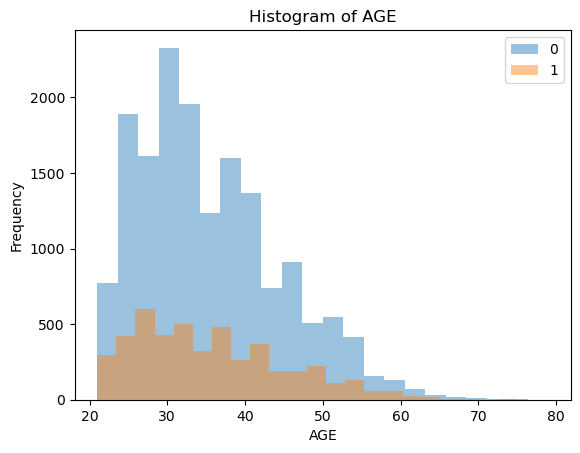

In [100]:
feat = "AGE"
train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=22, alpha=0.45, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

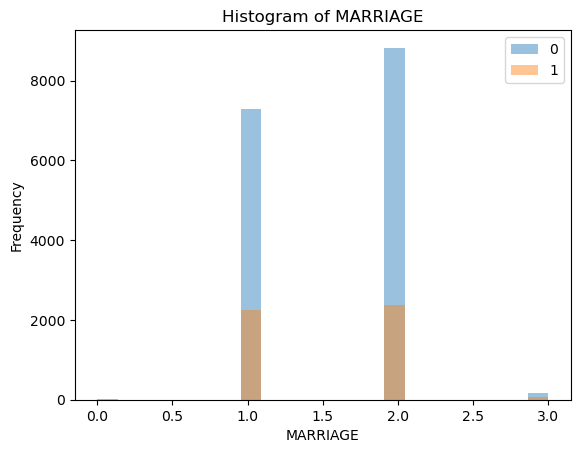

In [101]:
feat = "MARRIAGE"
train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=22, alpha=0.45, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

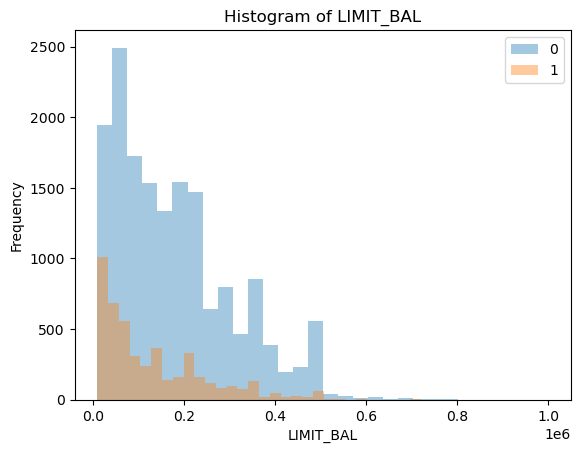

In [102]:
feat = "LIMIT_BAL"
train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=30, alpha=0.4, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

In [103]:
...

Ellipsis

**Trying to determine if it is a class imbalance problem:**

Given that this is a classification problem, the metrics we can use for assessment, as discussed in class, include score, precision, recall, F1 score, AUC, and ROC. However, since this is a class imbalance problem, relying on score alone may not be advisable. For example, our baseline model—a dummy classifier—yields a training score of 0.77, which can be quite misleading. Therefore, recall emerges as the most suitable metric for this dataset.

Prioritizing recall enables us to address the issue of false negatives effectively. In the context of default detection, it is more critical to avoid false negatives than false positives. While a higher false positive rate might mean being stringent on default-indicative activity, it is far more detrimental to let a customer go undetected and subsequently default. By focusing on recall as our primary metric, we aim to minimize the occurrence of missed defaults. Identifying as many true defaults as possible is essential for mitigating financial risk, even if it results in flagging some non-defaulting customers. By maximizing recall, the model can capture most high-risk cases, aligning with our objective of reducing credit losses due to undetected defaults.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->
In our feature engineering process, we focused on creating new features to highlight patterns in client behavior, while also renaming a column for consistency. First, we renamed PAY_0 to PAY_1 to align the naming conventions across repayment months (PAY_1 through PAY_6). Then, we introduced a feature called PAY_STATUS, which is the average of these six repayment statuses and serves as a single measure of a client's overall payment behavior—higher values here indicate a tendency toward delayed payments, which could signal an increased risk of default.

To capture average financial activity, we calculated AVG_BILL, representing the average bill amount over six months, and AVG_PAY_AMT, which gives the average payment amount. From these, we created a new feature called AVG_BILL_REMAINDER, which is the difference between AVG_BILL and AVG_PAY_AMT. This feature reflects the average unpaid balance each month, potentially indicating financial stress when the value is high. Finally, we streamlined the dataset by dropping AVG_BILL and AVG_PAY_AMT, keeping only the most insightful features for modeling. Altogether, these engineered features provide a more focused view of each client’s financial health, which will be useful as we move into analysis and model training.
<br><br>

In [121]:
train_df = train_df.rename(columns={'PAY_0': 'PAY_1'})
test_df = test_df.rename(columns={'PAY_0': 'PAY_1'})

payment_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_df['PAY_STATUS'] = train_df[payment_cols].mean(axis=1)


def add_average_columns(df):
    df['AVG_BILL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1).round(1)
    df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1).round(1)
    df['AVG_BILL_REMAINDER'] = df['AVG_BILL'] - df['AVG_PAY_AMT']

# Apply the function to both test and train splits
add_average_columns(test_df)
add_average_columns(train_df)

train_df.drop(columns={"AVG_BILL", "AVG_PAY_AMT"})
test_df.drop(columns={"AVG_BILL", "AVG_PAY_AMT"})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   SEX                         21000 non-null  int64  
 2   EDUCATION                   21000 non-null  int64  
 3   MARRIAGE                    21000 non-null  int64  
 4   AGE                         21000 non-null  int64  
 5   PAY_1                       21000 non-null  int64  
 6   PAY_2                       21000 non-null  int64  
 7   PAY_3                       21000 non-null  int64  
 8   PAY_4                       21000 non-null  int64  
 9   PAY_5                       21000 non-null  int64  
 10  PAY_6                       21000 non-null  int64  
 11  BILL_AMT1                   21000 non-null  float64
 12  BILL_AMT2                   21000 non-null  float64
 13  BILL_AMT3                   2100

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [118]:
# Checking if there are any infinity values after averaging
res = np.isinf(X_train).sum()

# Checking if there are any nan values after averaging
res2 = np.isnan(X_train).sum()

display(res)
display(res2)

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)